<a href="https://colab.research.google.com/github/rodrigoorf/mqtt_example/blob/master/mqtt_publisher_subscriber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Etapa 1 - Instalar a biblioteca Eclipse Paho MQTT Python
# Implementa as versões 3.1 e 3.1.1 do Protocolo MQTT
# https://pypi.org/project/paho-mqtt/

!pip install paho-mqtt

     |████████████████████████████████| 102kB 2.3MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.0-cp36-none-any.whl size=61415 sha256=0192a9273277f903890cb104ba445503c45d86e7500da07f6f25a3ac62d3efe9
  Stored in directory: /root/.cache/pip/wheels/02/94/6c/8474137cb7a5a3e001d70a22c8ff919caee69435376bccce79
Successfully built paho-mqtt


In [4]:
# Etapa 2 - Importar biblioteca do MQTT
import paho.mqtt.client as mqtt
import time

status="off"

def on_connect(client, userdata, flags, rc):
    if rc==0:
        print("Conectado com Sucesso (OK)")
        print("Código de Retorno da Conexão (RC): ",rc)
        print("Cliente: ", client)
        print("User Data: ", userdata)
    else:
        print("Problema de Conexão - Returned Code (RC) = ",rc)


def on_disconnect(client, userdata, rc):
        print("Desconectado- Result Code (RC) = ",rc)


def on_message(client, userdata, message):
    #print("Message received: " + message.payload)
    print("Mensagem Recebida: " + message.payload.decode())
    #print("Message received: " + str(message.payload))
    

def on_message_received(client, userdata, message):
    global status
    #print("Message received: " + message.payload)
    print("Mensagem Recebida: " + message.payload.decode())
    #print("Message received: " + str(message.payload))
    #if message.payload.decode() in ['on', 'On', 'ON']:
    comando=message.payload.decode()
    print("Comando:",comando)
    print("Tamanho:",len(comando.strip()))
    comando=comando.strip()
    print("Comando:",comando)
    print("Tipo: ",type(comando))
    if comando=='on':
      status="on" 
    if comando=='off':
      status="off"

broker="broker.hivemq.com"
#broker="broker.mqttdashboard.com"
#broker="test.mosquitto.org"
#broker="iot.eclipse.org"


#client=mqtt.Client("")
#client=mqtt.Client("espec_iot_pucpr")
client=mqtt.Client(client_id="rodrigo_fr")
#client=mqtt.Client(client_id="espec_iot_pucpr",clean_session=False)
#client=mqtt.Client(client_id="espec_iot_pucpr",clean_session=False,userdata="iotpucpr")
#client=mqtt.Client(client_id="espec_iot_pucpr",clean_session=False,userdata="iotpucpr",protocol=4, transport="tcp")
#client=mqtt.Client("espec_iot_pucpr",clean_session=False)
#client=mqtt.Client("espec_iot_pucpr",clean_session=False,userdata="iotpucpr")

client.on_connect=on_connect
client.on_disconnect=on_disconnect
client.on_message= on_message                      #attach function to callback

client.message_callback_add("iot/espec/pucpr/light/comando_freire", on_message_received)

print("Conectando-se ao Broker: ",broker)

client.connect(broker,port=1883, keepalive=60)

client.loop_start()   # Necessario para executar as funções de Callback

#client.subscribe("iot/espec/pucpr/medida")
client.subscribe(topic="iot/espec/pucpr/light/comando_freire")


for i in range(200):
  #print("Medida 1: ",i)
  j=pow(i,2)
  #print("Medida 2: ",j)
  print("Medida 1=",i,"\tMedida 2=",j)
  print("Iluminação = ",status)
  client.publish("espec_iot_pucpr/medida1",i)
  client.publish("espec_iot_pucpr/medida2",j)
  client.publish("iot/espec/pucpr/light",status)
  time.sleep(1)

client.loop_stop()

client.disconnect()



Conectando-se ao Broker:  broker.hivemq.com
Medida 1= 0 	Medida 2= 0
Iluminação =  off
Conectado com Sucesso (OK)
Código de Retorno da Conexão (RC):  0
Cliente:  <paho.mqtt.client.Client object at 0x7f90ea933c88>
User Data:  None
Desconectado- Result Code (RC) =  1
Conectado com Sucesso (OK)
Código de Retorno da Conexão (RC):  0
Cliente:  <paho.mqtt.client.Client object at 0x7f90eb642fd0>
User Data:  None
Medida 1= 1 	Medida 2= 1
Iluminação =  off
Medida 1= 2 	Medida 2= 4
Iluminação =  off
Desconectado- Result Code (RC) =  1
Conectado com Sucesso (OK)
Código de Retorno da Conexão (RC):  0
Cliente:  <paho.mqtt.client.Client object at 0x7f90ea926e10>
User Data:  None
Medida 1= 3 	Medida 2= 9
Iluminação =  off
Medida 1= 4 	Medida 2= 16
Iluminação =  off
Desconectado- Result Code (RC) =  1
Conectado com Sucesso (OK)
Código de Retorno da Conexão (RC):  0
Cliente:  <paho.mqtt.client.Client object at 0x7f90eb642fd0>
User Data:  None
Medida 1= 5 	Medida 2= 25
Iluminação =  off
Desconectado- Re

KeyboardInterrupt: ignored

Envio das mensagens "on" e "off" através do celular

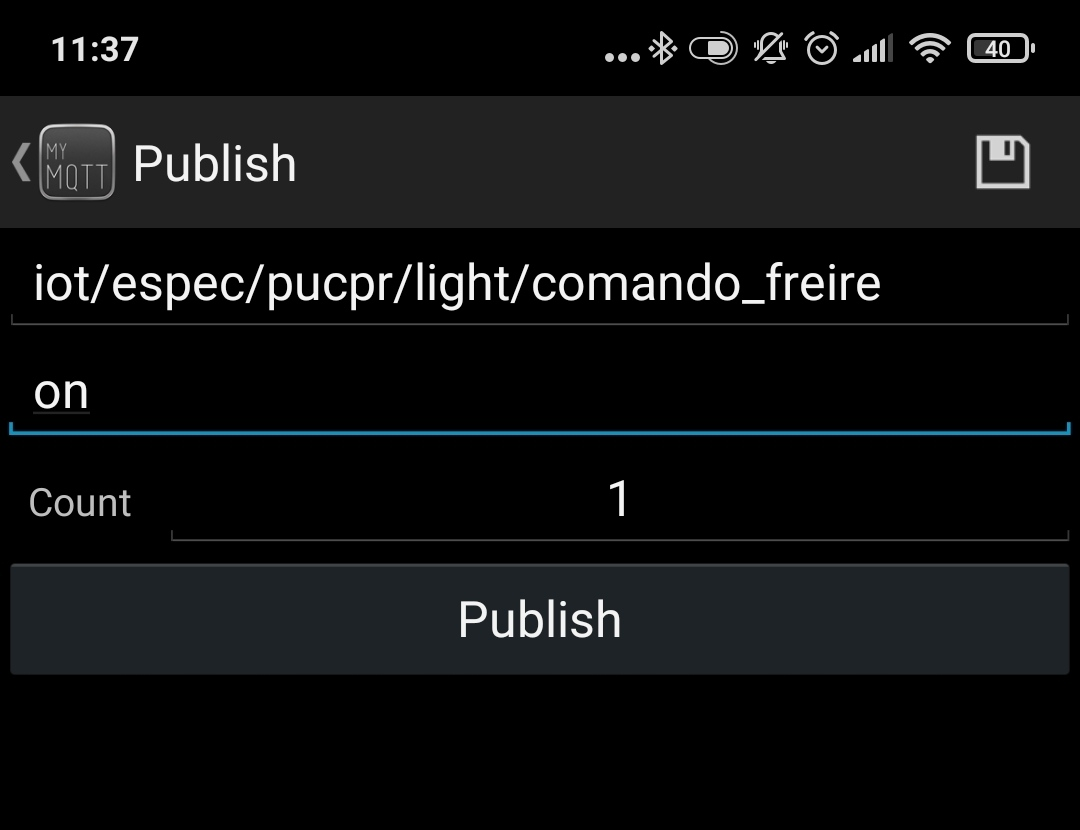

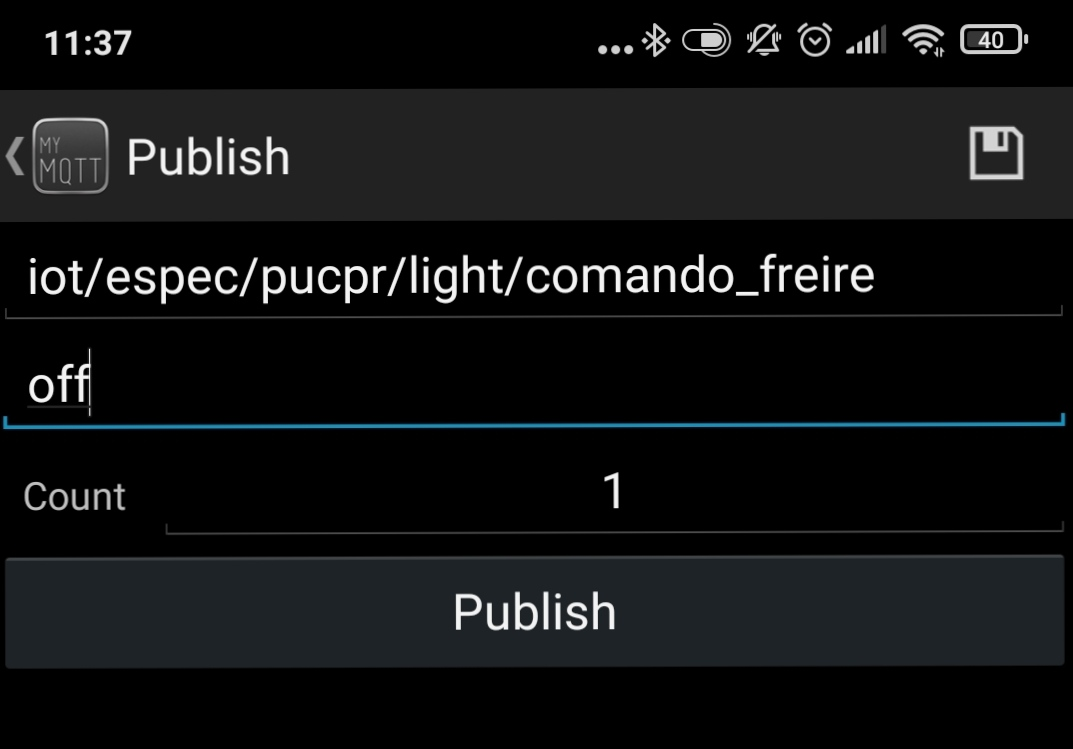